In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
df1= pd.read_csv("/Users/swati/Desktop/campaign_data.csv")
df1

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [30]:
df1.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [27]:
df2=df1.groupby(['Promotion']).mean()
df2= df2.reset_index()
df2

,Promotion,MarketID,LocationID,AgeOfStore,week,SalesInThousands
0,1,5.790698,488.465116,8.279070,2.5,58.099012
1,2,5.893617,497.446809,7.978723,2.5,47.329415
2,3,5.468085,453.808511,9.234043,2.5,55.364468


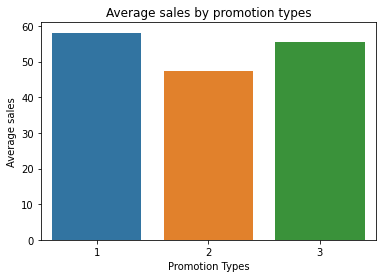

In [38]:
#A.
plot1 = sns.barplot(x='Promotion', y='SalesInThousands', data= df2);
plt.xlabel('Promotion Types');
plt.ylabel('Average sales');
plt.title('Average sales by promotion types');


*The above barplot shows the average sales in thousands by different promotion types. It displays that promotions 1 and 3 had approxiamately similar average sales whereas promotion 2 generated lowest.*

In [33]:
#B.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [42]:
df1['week'] = pd.Categorical(df1['week'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MarketID          548 non-null    int64   
 1   MarketSize        548 non-null    object  
 2   LocationID        548 non-null    int64   
 3   AgeOfStore        548 non-null    int64   
 4   Promotion         548 non-null    int64   
 5   week              548 non-null    category
 6   SalesInThousands  548 non-null    float64 
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 26.5+ KB


<AxesSubplot:xlabel='Promotion', ylabel='count'>

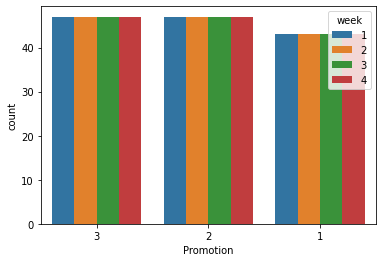

In [45]:
plot2=sns.countplot(x='Promotion', data=df1, hue='week', order = df1['Promotion'].value_counts().index);
plot2

*The above graph shows the count of promotion types held in 4 weeks. Promotion 3 and 2 had the most count in a duration for 4 weeks. Promotion 1 was held least across the period of 4 weeks. This shows that promotion 1 was even held for less times but still it generated highest sales (which can be seen in the last plot). Yes, week could be a cofounding variable because it could be essential in determining the return on investment wherein duration could play an important role in decreasing costs.*

In [47]:
#C.
df1.groupby('Promotion')['AgeOfStore'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


*Minimum age of store is same for all the three promotions. Age varies with a deviation of 6.6 approx for all the three promotions in a normal distributed curve.* 

*Promotion 3 is the oldest store whereas promotion 2 is youngest store with ages of 9.2 and 7.97 respectively.*

In [50]:
#D.
stat, p = stats.normaltest(df1['SalesInThousands'].tolist())
alpha = 0.05
print(f"p = {p}")

p = 2.9699434440135903e-11


*Our null hypothesis is that sales is normally distributed.*

*We can conclude that we can reject the null hypothesis because our p value is lesser than our threshold alpha which means sales are not normally distributed.*

In [53]:
stats.normaltest(df1['SalesInThousands'].tolist())

NormaltestResult(statistic=48.47978622544174, pvalue=2.9699434440135903e-11)

In [65]:
#Comparing results of promotions 1 and promotions 2 on the basis of sales
t, p = stats.ttest_ind(df1.loc[df1['Promotion'] == 1, 'SalesInThousands'].values,
                       df1.loc[df1['Promotion'] == 2, 'SalesInThousands'].values, equal_var=False)

In [66]:
t, p

(6.42752867090748, 4.2903687179871785e-10)

*Our null hypothesis is that promotion 1 performed better then promotion 2.*

*Since our p value is lesser than alpha, we can reject this null hypothesis and we can say that promotion 1 did not perform better than promotion 2.*

In [67]:
#Comparing results of promotions 1 and promotions 3 on the basis of sales
t, p = stats.ttest_ind(df1.loc[df1['Promotion'] == 1, 'SalesInThousands'].values,
                       df1.loc[df1['Promotion'] == 3, 'SalesInThousands'].values, equal_var=False)

In [69]:
t, p

(1.5560224307758634, 0.12059147742229478)

*Our null hypothesis is that promotion 1 performed better then promotion 3.*

*Since our p value is higher than alpha, we can fail to reject this null hypothesis and we can say that promotion 1 did perform better than promotion 3.*

In [71]:
#Comparing results of promotions 2 and promotions 3 on the basis of sales
t, p = stats.ttest_ind(df1.loc[df1['Promotion'] == 2, 'SalesInThousands'].values,
                       df1.loc[df1['Promotion'] == 3, 'SalesInThousands'].values, equal_var=False)

In [73]:
t, p

(-4.88139271089348, 1.5692733176039892e-06)

*Our null hypothesis is that promotion 2 performed better then promotion 3.*

*Since our p value is lesser than alpha, we can reject this null hypothesis and we can say that promotion 2 did not perform better than promotion 3.*

*Based on our above tests, we can say promotion 3 perfomed the best if compared with promotions 1 and 2. We can suggest lobster land to spend more on promotion 3 and for higher duration which will indeed provide more sales based on our data pattern as of now.*

# Part 2

In [76]:
#A.
app_df = pd.read_csv('/Users/swati/Desktop/lobster_run.csv')
app_df

,userid,version,sum_gamerounds,retention_1,retention_7,user_spend
0,1,Gulf of Maine,3,False,False,17.09
1,2,Gulf of Maine,38,True,False,15.30
2,7,Gulf of Maine,0,False,False,13.67
3,12,Gulf of Maine,0,False,False,16.92
4,14,Gulf of Maine,39,True,False,8.42
...,...,...,...,...,...,...
90184,90182,North Atlantic,10,True,False,11.39
90185,90185,North Atlantic,97,True,False,15.52
90186,90186,North Atlantic,30,False,False,14.62
90187,90188,North Atlantic,51,True,False,13.85


In [84]:
app_df.groupby('version')['user_spend'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
Gulf of Maine,44700.0,15.030548,2.750119,4.50,13.17,15.03,16.89,26.55
North Atlantic,45489.0,15.001504,2.744418,4.05,13.16,15.00,16.85,28.00


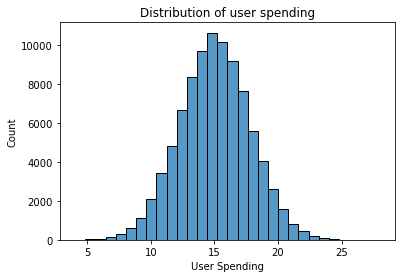

In [80]:
sns.histplot(x='user_spend', data=app_df, bins=30);
plt.xlabel('User Spending');
plt.title('Distribution of user spending');

*My plot is normally distributed with a mean of $15 which varies with a deviation of $2.75 across the first standard deviations.*

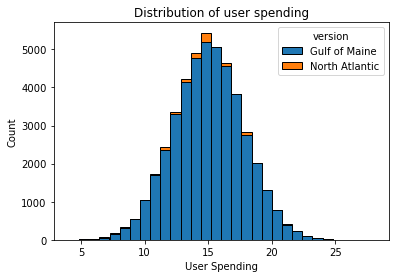

In [83]:
#B.
sns.histplot(x='user_spend', data=app_df, hue='version', bins=30, alpha=1);
plt.xlabel('User Spending');
plt.title('Distribution of user spending');

*The above plot shows the distribution of user spending on the basis of two versions. Both the versions showed approximately same distrubition with north atlantic with slightly higher count. Mean of gulf of maine is $15 with a deviation of $2.75 whereas north atlantic had a mean of $15 and deviation of $2.74.*

In [88]:
#C.
stat, p = stats.normaltest(app_df['user_spend'].tolist())
alpha=0.05

In [90]:
p

0.8896048112149306

*Our null hypothesis it that user spending is normally distributed and we will check whether we reject or we fail to reject our null hypothesis.*

*We fail to reject the null hypothesis because p is higher than alpha which also makes user spending normally distributed.*



In [94]:
#D.
t, p = stats.ttest_ind(app_df.loc[app_df['version'] == 'Gulf of Maine', 'user_spend'].values,
                       app_df.loc[app_df['version'] == 'North Atlantic', 'user_spend'], equal_var=False)
alpha=0.05

In [98]:
p

0.11242429738514634

*Our null hypothesis is that version does not impact the user spending in application.*

*Since our p value is higher than alpha which means we fail to reject the null hypothesis. So, we can state that difference in levels (version) will not impact the user spending much.*

In [102]:
#E.
pd.crosstab(app_df['version'], app_df['retention_1'])

retention_1,False,True
version,,
Gulf of Maine,24666,20034
North Atlantic,25370,20119


In [103]:
pd.crosstab(app_df['version'], app_df['retention_7'])

retention_7,False,True
version,,
Gulf of Maine,35956,8744
North Atlantic,37210,8279


In [105]:
pd.value_counts(app_df['version'], normalize=True)

North Atlantic    0.504374
Gulf of Maine     0.495626
Name: version, dtype: float64

*The user engagement after 1 day of downloading the App for both the versions was higher than that of 7 days. It can be said that engagement is likely to decrease after 7 days of downloading the app than for 1 day.*

*Also, both the version levels had approximately same count of user retention for both retention 1 and 7 individually.* 

*version isn't really impacting user behaivour because both the versions had approximately same count in the dataset which means it really doesn't matter for users to behave differently on the basis of version.*

In [108]:
#F.
#expected value= total true count* proportion of that version in dataset
north_version = 40153 * 0.504374
maine_version = 40153 * 0.495626

#observed= actual count of individual versions of retentions from data 
Obs_val = np.array([20119, 20034])
exp_val = np.array([north_version, maine_version])

stat, p = stats.chisquare(Obs_val, f_exp=exp_val)
alpha=0.05

In [110]:
p

0.18391255949974217

*Our null hypothesis is that versions wouldn't impact the retention of users after 1 day of downloading the app.*

*since our p is higher than alpha, we fail to reject the hypothesis which means versions actually doesn't impact user retention much.*

In [113]:
#G.
pd.value_counts(app_df['retention_7'])

False    73166
True     17023
Name: retention_7, dtype: int64

In [115]:
north_version2 = 17023 * 0.504374
maine_version2 = 17023 * 0.495626

#observed= actual count of individual versions of retentions from data 
Obs_val2 = np.array([8279, 8744])
exp_val2 = np.array([north_version2, maine_version2])

stat, p = stats.chisquare(Obs_val2, f_exp=exp_val2)
alpha=0.05

In [117]:
p

2.532096033395736e-06

*Our null hypothesis is that versions do not impact the user retention after 7 days of downloading the app.*

*Since our p value is lower than alpha, we can reject this hypothesis. So, versions do impact the user retention after 7 days of downloading the app.* 

In [118]:
#H. 

*H.* 
*Based on my analysis above about lobster_run, I think versions should not be a point of concentration on deciding the user behavior, retention 1 and user spending (based on our t-test) in application. But retention 7 (chi-squared goodness of fit) is impacted by versions. So, instead of focussing on versions, lobster_run could focus on things to attract more retention of users and user spendings instead of making more versions. Since, versions do not meaningfully impact the user behavior and user spending, lobster_run can add more functionalities, specifications such as multi-player game with microphone accessibility in which users can communicate while playing together. This will make it even more engaging for users which might increase our user spending and user retention. Also, if we look from retention 1 standpoint, we had more number of users, we can add some joining bounty coupons or friend referral points in the game which is usually paid for older users, which can increase user retention 7 too.*

# Part 3
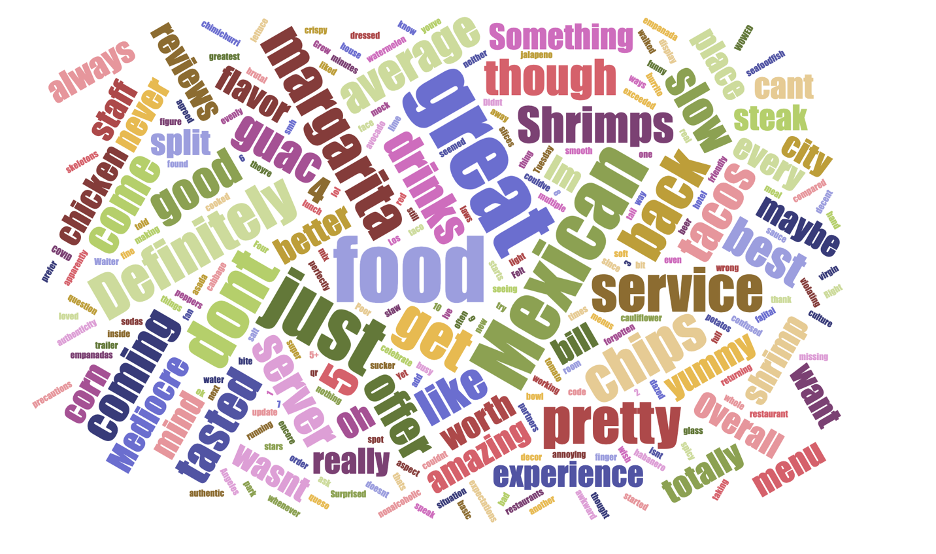

*I chose Papagayo yelp reviews to generate my word cloud. Papagayo is a Mexican restaurant at Somerville. I have been to this place multiple times. The word generator shoed my insights that I myself felt after going there. I chose a word cloud of 500 words for first. It showed me the frequency of words on the basis of size in the word cloud. The bigger the word is, the higher is its frequency in most recent 10 reviews. Since Mexican is the biggest word here, so it appeared the most in reviews which makes it a Mexican restaurant if a person who doesn’t know about Papagayo sees this word cloud. Then I see chicken never together which means chicken dishes are not really liked by people here. Also, I see margarita in the priority too, so we can judge that it’s a good place for margarita. However, I see the word slow which might indicate the service speed. It was a little bit difficult to get insights with 500 words. So in the next word cloud I chose 50 words instead.* 

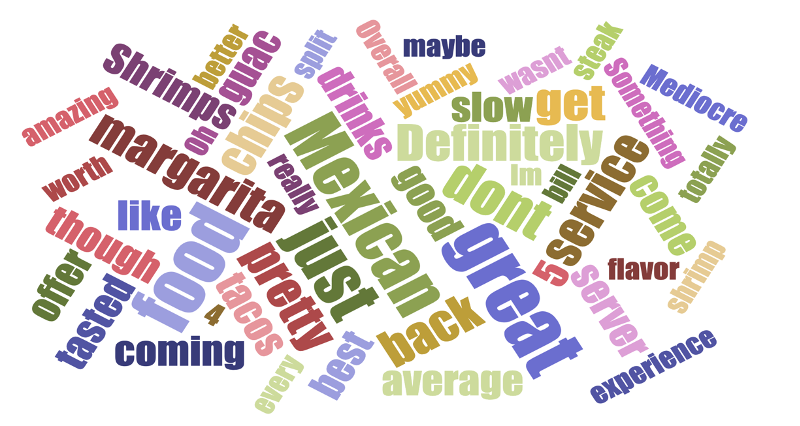
*In the above word cloud, I see 50 most frequent words. I see shrimps two times which might mean that there’s a good dish with shrimps. Also, I see average which means some people had an average experience at Papagayo. As per my experience at Papagayo, I too feel the service speed is slow and the shrimp tacos are one of the best things I have had here which is displayed in word cloud too. So, we can state that the word cloud is showing some meaningful insights.*